In [218]:
import pandas as pd

In [219]:
a = pd.read_csv('train_labels.csv')
a.head()

,filepath,label
0,train/enojado/gau_11.png,0
1,train/enojado/gau_15.png,0
2,train/enojado/gau_4.png,0
3,train/enojado/mov_7.png,0
4,train/enojado/n_1.jpg,0


In [220]:
a.iloc[0,1]

np.int64(0)

## DATALOADER

In [221]:
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image

class EmotionsDataset(Dataset):
    def __init__(self, train_labels:pd.DataFrame,transform = None):
        self.data = pd.read_csv(train_labels)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx,0]
        img = read_image(img_path)/255.0
        label = self.data.iloc[idx,1]

        if self.transform:
            img = self.transform(img)

        if img.shape[0] == 4:
            img = img[:3,:,:]

        return img, label

In [222]:
from torch.utils.data import DataLoader
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((256,256)),
])
traindataset = EmotionsDataset('train_labels.csv', transform=transform)
trainloader = DataLoader(traindataset,batch_size=32,shuffle=True)

In [223]:
img,label = next(iter(trainloader))
img.shape,label

(torch.Size([32, 3, 255, 255]),
 tensor([0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0,
         1, 2, 1, 1, 0, 2, 0, 2]))

In [224]:
print(traindataset.__len__())

42


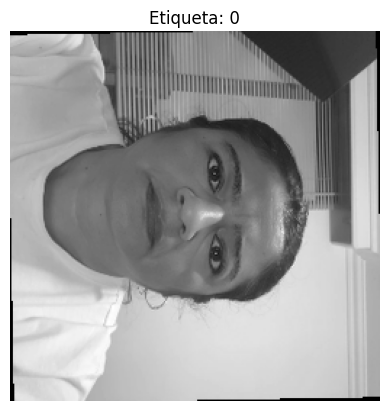

In [227]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

image, label = traindataset[20]

plt.imshow(to_pil_image(image))
plt.title(f"Etiqueta: {label}")
plt.axis('off')
plt.show()

In [239]:
import torch
device = torch.device("cuda" if torch.cuda.is_available()else"cpu")
print(device)

cpu


In [ ]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits